<a href="https://colab.research.google.com/github/Rusbel-ray/Perceptron---Rusbel-Abarca/blob/main/Perceptron%2C_keras%2C_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Época 1:
  Entrada: [0 0], Deseado: 0, Salida: 1, Error: -1
  Pesos: [0.00728649 0.94909664], Umbral: -0.5541888850966389
  Entrada: [0 1], Deseado: 0, Salida: 1, Error: -1
  Pesos: [0.00728649 0.84909664], Umbral: -0.4541888850966389
  Entrada: [1 0], Deseado: 0, Salida: 1, Error: -1
  Pesos: [-0.09271351  0.84909664], Umbral: -0.35418888509663893
  Entrada: [1 1], Deseado: 1, Salida: 1, Error: 0
  Pesos: [-0.09271351  0.84909664], Umbral: -0.35418888509663893
Error total en la época 1: 3

Época 2:
  Entrada: [0 0], Deseado: 0, Salida: 1, Error: -1
  Pesos: [-0.09271351  0.84909664], Umbral: -0.25418888509663895
  Entrada: [0 1], Deseado: 0, Salida: 1, Error: -1
  Pesos: [-0.09271351  0.74909664], Umbral: -0.15418888509663894
  Entrada: [1 0], Deseado: 0, Salida: 1, Error: -1
  Pesos: [-0.19271351  0.74909664], Umbral: -0.05418888509663894
  Entrada: [1 1], Deseado: 1, Salida: 1, Error: 0
  Pesos: [-0.19271351  0.74909664], Umbral: -0.05418888509663894
Error total en la época 2: 3

Ép

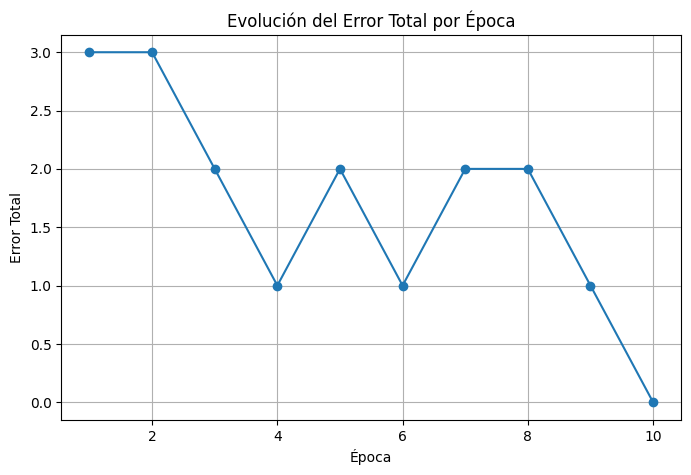

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Inicializar los pesos y el umbral
def inicializar_pesos(n):
    W = np.random.uniform(-1, 1, n)  # Pesos aleatorios
    theta = np.random.uniform(-1, 1)  # Umbral aleatorio
    return W, theta

# Función de activación (escalón)
def funcion_activacion(net):
    return 1 if net >= 0 else 0

# Propagación
def calcular_salida(X, W, theta):
    net = np.dot(X, W) - theta
    return funcion_activacion(net)

# Calcular el error
def calcular_error(d, y):
    return d - y

# Actualizar pesos y umbral
def actualizar_pesos(W, theta, X, error, alpha):
    W = W + alpha * error * X
    theta = theta - alpha * error
    return W, theta

# Entrenamiento del perceptrón
def entrenar_perceptron(X, D, alpha=0.1, epochs=10):
    n = X.shape[1]  # Número de entradas
    W, theta = inicializar_pesos(n)  # Inicializar pesos y umbral
    errores_por_epoca = []  # Para graficar el error

    for epoch in range(epochs):
        total_error = 0
        print(f"Época {epoch + 1}:")
        for x, d in zip(X, D):
            y = calcular_salida(x, W, theta)
            error = calcular_error(d, y)
            W, theta = actualizar_pesos(W, theta, x, error, alpha)
            total_error += abs(error)
            print(f"  Entrada: {x}, Deseado: {d}, Salida: {y}, Error: {error}")
            print(f"  Pesos: {W}, Umbral: {theta}")
        errores_por_epoca.append(total_error)
        print(f"Error total en la época {epoch + 1}: {total_error}\n")
        if total_error == 0:  # Detener si no hay errores
            break

    return W, theta, errores_por_epoca

# Prueba del perceptrón
def probar_perceptron(X, W, theta):
    print("Resultados finales:")
    for x in X:
        y = calcular_salida(x, W, theta)
        print(f"  Entrada: {x}, Salida: {y}")

# Graficar el error por época
def graficar_error(errores_por_epoca):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(errores_por_epoca) + 1), errores_por_epoca, marker='o')
    plt.title("Evolución del Error Total por Época")
    plt.xlabel("Época")
    plt.ylabel("Error Total")
    plt.grid()
    plt.show()

# Ejecutar el perceptrón
if __name__ == "__main__":
    # Datos de entrada (AND lógico)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    D = np.array([0, 0, 0, 1])  # Salidas deseadas

    # Entrenar
    W, theta, errores_por_epoca = entrenar_perceptron(X, D, alpha=0.1, epochs=20)

    # Probar
    probar_perceptron(X, W, theta)

    # Graficar
    graficar_error(errores_por_epoca)
